In [1]:
import pandas as pd

df_1 = pd.read_csv("../data/clean/digital_footprints_cleaned.csv")
df_2 = pd.read_csv("../data/clean/df_final_demo_cleaned.csv") 
df_3 = pd.read_csv("../data/clean/df_final_experiment_clients_cleaned.csv") 

In [2]:
df_1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [3]:
df_2.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60.5,U,2,45105.30,6,9
1,2304905,7,94,58.0,U,2,110860.30,6,9
2,1439522,5,64,32.0,U,2,52467.79,6,9
3,1562045,16,198,49.0,M,2,67454.65,3,6
4,5126305,12,145,33.0,F,2,103671.75,0,3


In [4]:
df_3.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [5]:
# Merge the datasets
df = pd.merge(df_1, df_3, on='client_id', how='left')
df = pd.merge(df, df_2, on='client_id', how='left')

# Convert date_time to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

In [20]:
# Identify users who reached the final 'confirm' step
completed_users = df[df['process_step'] == 'confirm']['client_id'].nunique()
total_users = df['client_id'].nunique()
completion_rate = completed_users / total_users

print(f"Completion Rate: {completion_rate:.2%}")

Completion Rate: 67.53%


In [12]:
# all unique process steps to understand the user journey
print("Unique process steps in order of occurrence:")
print(df.groupby('process_step')['date_time'].min().sort_values())

Unique process steps in order of occurrence:
process_step
step_3    2017-03-15 00:03:03
start     2017-03-15 00:19:28
step_1    2017-03-15 00:20:50
step_2    2017-03-15 00:22:52
confirm   2017-03-15 00:26:24
Name: date_time, dtype: datetime64[ns]


In [14]:
df.head(10)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0


In [16]:
df.shape

(755405, 14)

In [23]:
null_counts = df.isnull().sum()
print(null_counts)

client_id                0
visitor_id               0
visit_id                 0
process_step             0
date_time                0
Variation           434096
clnt_tenure_yr      305689
clnt_tenure_mnth    305689
clnt_age            305701
gendr               305689
num_accts           305689
bal                 305689
calls_6_mnth        305689
logons_6_mnth       305689
dtype: int64


In [24]:
df_cleaned = df.dropna()

In [25]:
df_cleaned.shape

(321195, 14)

In [26]:
df_cleaned.head(100)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7286739,450196013_75056881844,841652923_56424358687_156740,step_2,2017-04-05 19:00:54,Control,6.0,77.0,36.5,U,2.0,72032.56,1.0,4.0
96,7286739,450196013_75056881844,841652923_56424358687_156740,step_1,2017-04-05 19:00:46,Control,6.0,77.0,36.5,U,2.0,72032.56,1.0,4.0
97,7286739,450196013_75056881844,841652923_56424358687_156740,start,2017-04-05 19:00:14,Control,6.0,77.0,36.5,U,2.0,72032.56,1.0,4.0
98,7286739,450196013_75056881844,841652923_56424358687_156740,start,2017-04-05 18:51:34,Control,6.0,77.0,36.5,U,2.0,72032.56,1.0,4.0


In [27]:
df_cleaned.to_csv("merged_df_clean.csv", index=False)

In [28]:
# Convert 'date_time' column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Sort by visit and timestamp
df_sorted = df.sort_values(by=['visit_id', 'date_time'])

# Compute time difference between steps within each visit
df_sorted['step_duration'] = df_sorted.groupby('visit_id')['date_time'].diff().dt.total_seconds()

# Drop rows where duration is NaN (first step of each visit)
df_duration = df_sorted.dropna(subset=['step_duration'])

# Define age groups (e.g., <30, 30–39, 40–49, ..., 80+)
bins = [0, 29, 39, 49, 59, 69, 79, 200]
labels = ['<30', '30–39', '40–49', '50–59', '60–69', '70–79', '80+']
df_duration['age_group'] = pd.cut(df_duration['clnt_age'], bins=bins, labels=labels, right=True)

# Calculate average duration per process step per age group
avg_duration_by_age_step = df_duration.groupby(['age_group', 'process_step'])['step_duration'].mean().unstack()

avg_duration_by_age_step


/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/4268767541.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration['age_group'] = pd.cut(df_duration['clnt_age'], bins=bins, labels=labels, right=True)
/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/4268767541.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration_by_age_step = df_duration.groupby(['age_group', 'process_step'])['step_duration'].mean().unstack()


process_step,confirm,start,step_1,step_2,step_3
age_group,,,,,
<30,91.079899,132.777998,31.478574,30.559702,89.327075
30–39,100.840867,131.516140,32.375683,34.432825,94.026699
40–49,113.987155,157.787720,36.024049,38.689746,109.661934
50–59,139.001235,156.082066,43.297685,47.908331,109.616099
60–69,170.443856,162.400981,48.420203,54.266232,78.197519
70–79,195.840449,182.249128,57.059256,64.111984,80.856792
80+,203.061433,154.589937,52.513889,73.077451,87.194048


In [ ]:
# Observations:

# Younger users (<40) move more quickly through all steps.

# Older users (especially 70+) take significantly more time on each step—particularly at the start and confirm stages.

In [30]:
# Use correct capitalization for filtering
df_test = df_duration[df_duration['Variation'] == 'Test']
df_control = df_duration[df_duration['Variation'] == 'Control']

# Compute average duration per step per age group for both groups
avg_duration_test = df_test.groupby(['age_group', 'process_step'])['step_duration'].mean().unstack()
avg_duration_control = df_control.groupby(['age_group', 'process_step'])['step_duration'].mean().unstack()

avg_duration_test, avg_duration_control

/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/2163744619.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration_test = df_test.groupby(['age_group', 'process_step'])['step_duration'].mean().unstack()
/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/2163744619.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration_control = df_control.groupby(['age_group', 'process_step'])['step_duration'].mean().unstack()


(process_step     confirm       start     step_1     step_2      step_3
 age_group                                                             
 <30            96.649701  126.478066  31.161000  38.983783   92.353659
 30–39          95.475624  132.600660  30.739241  38.703983   93.179800
 40–49         108.926672  151.648291  33.834760  38.680790  109.724053
 50–59         140.529792  150.223050  39.101942  51.742833  111.917717
 60–69         170.655622  157.639190  44.368479  56.667993   82.818149
 70–79         194.528108  182.137640  50.809257  65.040334   82.878062
 80+           193.476027  153.234043  45.430693  84.864919   92.089947,
 process_step     confirm       start     step_1     step_2      step_3
 age_group                                                             
 <30            88.789536  125.122907  29.697157  24.260870   85.314994
 30–39          98.813619  125.698718  34.593635  28.077483   92.842237
 40–49         118.691315  168.449308  37.484980  34.753617  10

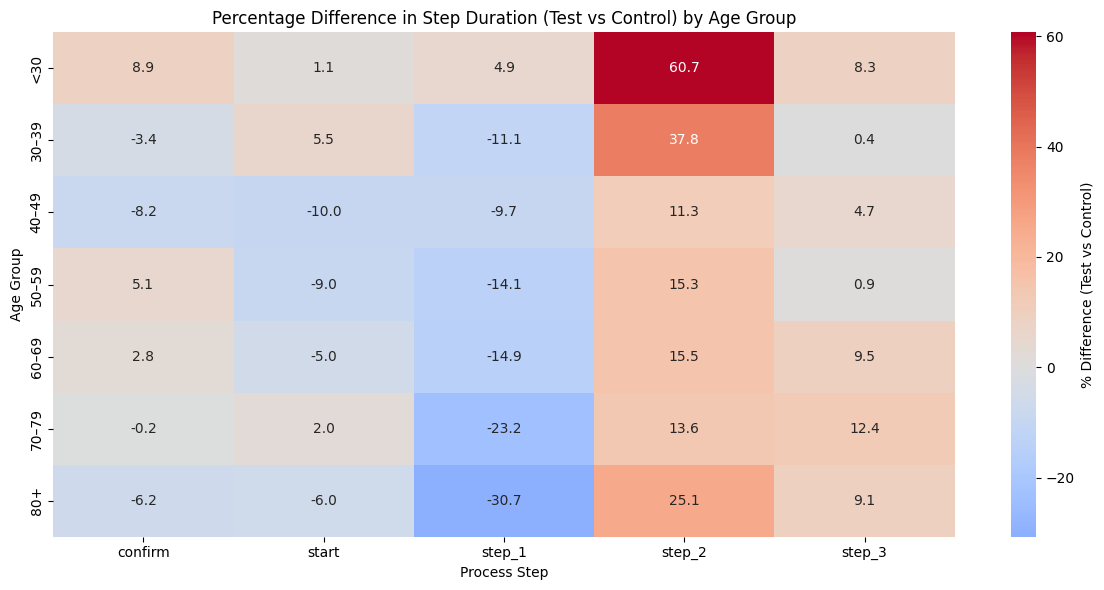

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage difference between Test and Control durations
duration_diff_pct = ((avg_duration_test - avg_duration_control) / avg_duration_control) * 100

# Set up a heatmap to visualize differences
plt.figure(figsize=(12, 6))
sns.heatmap(duration_diff_pct, annot=True, fmt=".1f", cmap="coolwarm", center=0, cbar_kws={'label': '% Difference (Test vs Control)'})
plt.title('Percentage Difference in Step Duration (Test vs Control) by Age Group')
plt.ylabel('Age Group')
plt.xlabel('Process Step')
plt.tight_layout()
plt.show()


In [ ]:
# How to interprete it?

# Blue cells: Users in the Test group took less time than Control → potentially more efficient.

# Red cells: Users in the Test group took more time → possibly confusion or slower flow.

# Near 0%: Little or no difference between Test and Control.

/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/3128614628.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration['age_group'] = pd.cut(df_duration['clnt_age'], bins=bins, labels=labels, right=True)
/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/3128614628.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_test = df_test.groupby(['age_group', 'process_step'])['step_duration'].mean().unstack()
/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/3128614628.py:17: FutureWarning: The default of obser

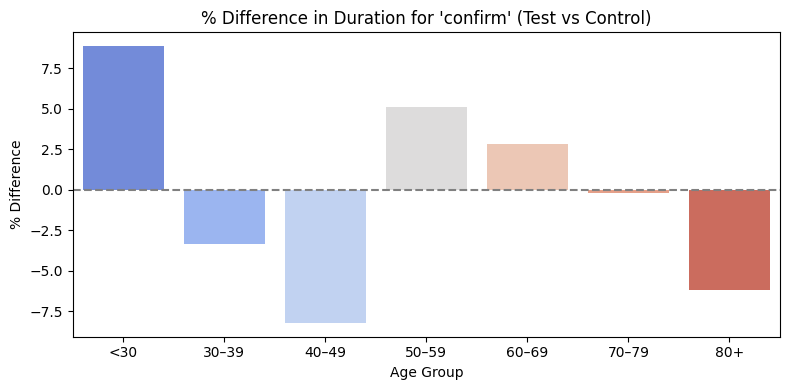

/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/3128614628.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duration_diff_pct.index, y=duration_diff_pct[step], palette="coolwarm")


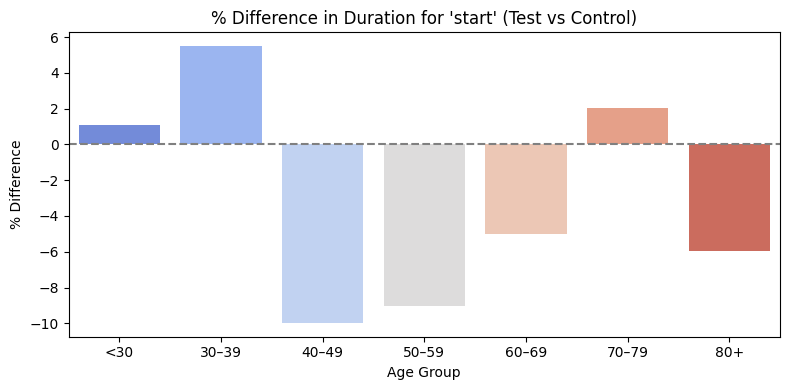

/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/3128614628.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duration_diff_pct.index, y=duration_diff_pct[step], palette="coolwarm")


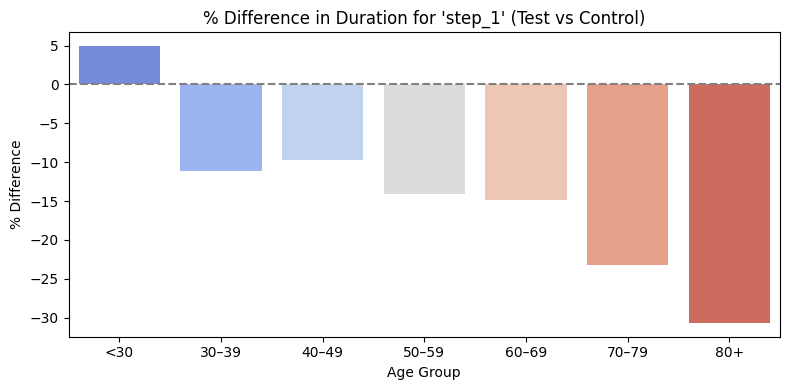

/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/3128614628.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duration_diff_pct.index, y=duration_diff_pct[step], palette="coolwarm")


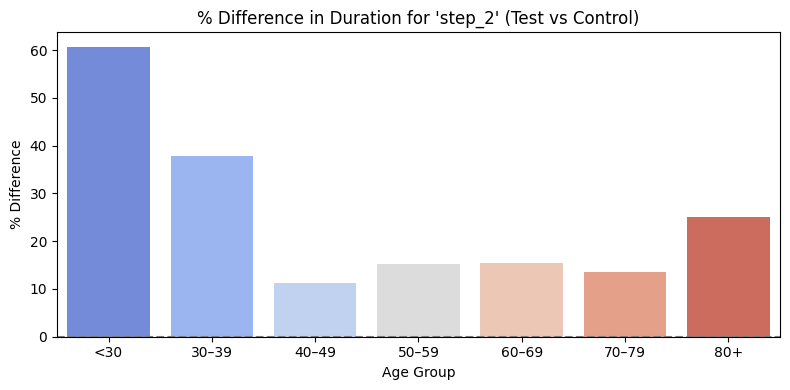

/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/3128614628.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duration_diff_pct.index, y=duration_diff_pct[step], palette="coolwarm")


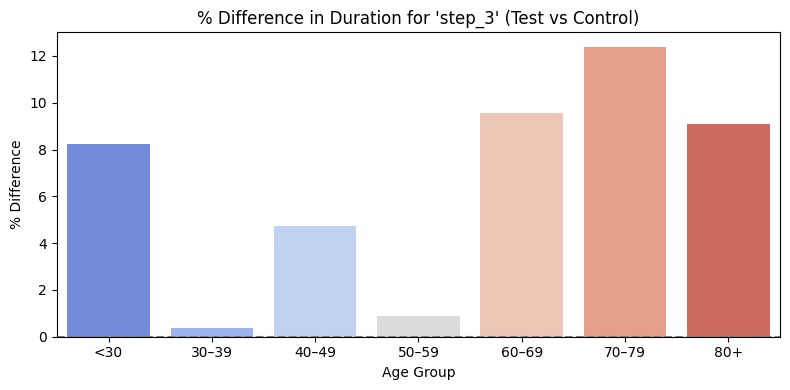

In [34]:
# Sort and calculate step durations
df_sorted = df.sort_values(by=['visit_id', 'date_time'])
df_sorted['step_duration'] = df_sorted.groupby('visit_id')['date_time'].diff().dt.total_seconds()
df_duration = df_sorted.dropna(subset=['step_duration'])

# Define age groups
bins = [0, 29, 39, 49, 59, 69, 79, 200]
labels = ['<30', '30–39', '40–49', '50–59', '60–69', '70–79', '80+']
df_duration['age_group'] = pd.cut(df_duration['clnt_age'], bins=bins, labels=labels, right=True)

# Filter by variation
df_test = df_duration[df_duration['Variation'] == 'Test']
df_control = df_duration[df_duration['Variation'] == 'Control']

# Calculate mean durations
avg_test = df_test.groupby(['age_group', 'process_step'])['step_duration'].mean().unstack()
avg_control = df_control.groupby(['age_group', 'process_step'])['step_duration'].mean().unstack()

# Compute % difference: (Test - Control) / Control * 100
duration_diff_pct = ((avg_test - avg_control) / avg_control) * 100

# Bar plot for each step
steps = duration_diff_pct.columns
for step in steps:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=duration_diff_pct.index, y=duration_diff_pct[step], palette="coolwarm")
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"% Difference in Duration for '{step}' (Test vs Control)")
    plt.ylabel("% Difference")
    plt.xlabel("Age Group")
    plt.tight_layout()
    plt.show()


In [ ]:
# --> Bars above 0% mean users in the Test group took more time than those in Control (possibly slower or more confusing UX).
# --> Bars below 0% indicate the Test group completed the step faster (possibly more efficient or clearer design).

# START Step
# - Time increases with age in both groups, but Test users in mid and older age groups (especially 30–59) took more time than Control.
# - This could suggest the new design slows down initial interaction for these users.

# step_1 and step_2
# - Younger users (<30, 30–39) tend to be faster by the Test version.
# - Older users (60+) take significantly more time in the Test version — possibly indicating:
# -> Harder-to-follow instructions
# -> Visual or accessibility challenges

# STEP_3
# - Results vary: some age groups benefit (e.g., <30 slightly faster), others (40–49, 50–59) take longer in the Test version.
# - May indicate inconsistency in the step's redesign or added complexity that affects certain age groups more than others.

# CONFIRM Step
# - Large positive values for 70–79 and 80+ → Test users take much longer to confirm.
# - Suggests that final confirmation UX in the test version might be confusing or perceived as risky (e.g., uncertainty, fear of making an irreversible mistake).

In [ ]:
Age-Specific Patterns
<30 and 30–39: Generally unaffected or slightly faster in the Test group → Test version likely optimized for younger users.

40–69: Mixed results; Test version often slightly slower, especially for multi-step tasks.

70+: Almost consistently slower in the Test group — the new design may not be senior-friendly.

Business & Design Implications
✅ If the Test design aims to improve UX for younger users, it’s working.

❌ If the goal is a universal redesign, the Test may be hurting older user experience.

🧪 Consider A/B testing separately by age or personalizing UX (e.g., simple mode for older users).

📊 Prioritize redesign of step_2 and confirm — these show the largest time penalties for seniors.

/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/4240376568.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration['age_group'] = pd.cut(df_duration['clnt_age'], bins=bins, labels=labels, right=True)
/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/4240376568.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_test = df_test.groupby(['age_group', 'process_step'])['step_duration'].mean().unstack()
/var/folders/74/2xg39v_50tv7vj24jw0r0b800000gn/T/ipykernel_39339/4240376568.py:17: FutureWarning: The default of obser

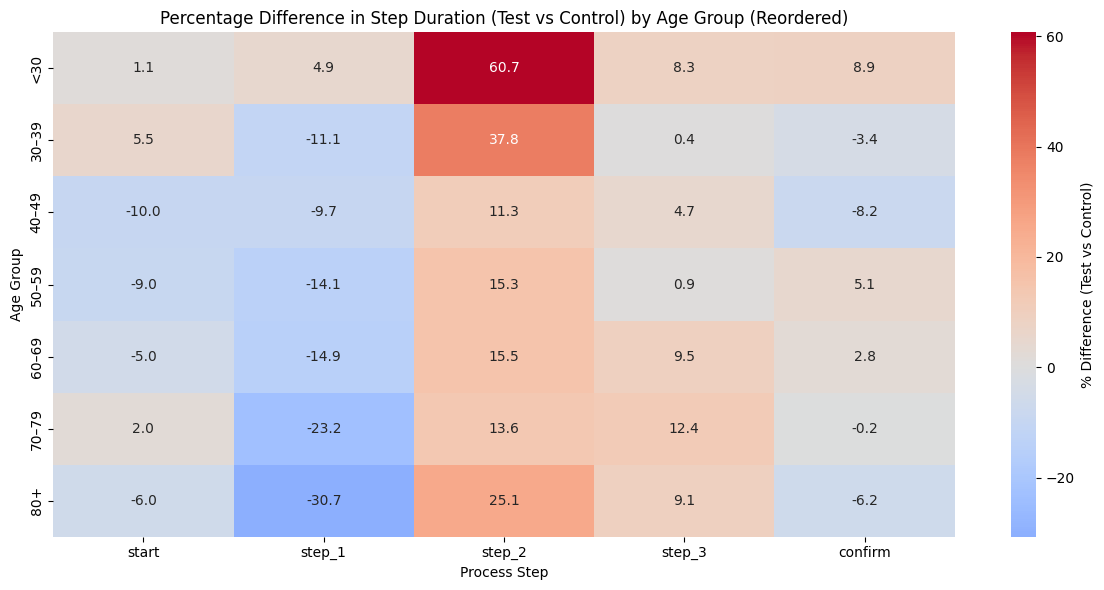

In [36]:
# Sort and calculate time spent on steps
df_sorted = df.sort_values(by=['visit_id', 'date_time'])
df_sorted['step_duration'] = df_sorted.groupby('visit_id')['date_time'].diff().dt.total_seconds()
df_duration = df_sorted.dropna(subset=['step_duration'])

# Define age groups
bins = [0, 29, 39, 49, 59, 69, 79, 200]
labels = ['<30', '30–39', '40–49', '50–59', '60–69', '70–79', '80+']
df_duration['age_group'] = pd.cut(df_duration['clnt_age'], bins=bins, labels=labels, right=True)

# Split into Test and Control groups
df_test = df_duration[df_duration['Variation'] == 'Test']
df_control = df_duration[df_duration['Variation'] == 'Control']

# Average durations
avg_test = df_test.groupby(['age_group', 'process_step'])['step_duration'].mean().unstack()
avg_control = df_control.groupby(['age_group', 'process_step'])['step_duration'].mean().unstack()

# % Difference
duration_diff_pct = ((avg_test - avg_control) / avg_control) * 100

# Reorder columns to place 'confirm' last
ordered_columns = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
duration_diff_pct = duration_diff_pct[ordered_columns]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(duration_diff_pct, annot=True, fmt=".1f", cmap="coolwarm", center=0,
            cbar_kws={'label': '% Difference (Test vs Control)'})
plt.title('Percentage Difference in Step Duration (Test vs Control) by Age Group (Reordered)')
plt.ylabel('Age Group')
plt.xlabel('Process Step')
plt.tight_layout()
plt.show()


In [ ]:
# HYPOTHESIS TESTING

# Objective: Test if the average time spent on each process step is significantly different between Test and Control groups — per age group.


In [40]:
import pandas as pd
from scipy.stats import ttest_ind


df['date_time'] = pd.to_datetime(df['date_time'])
df = df.sort_values(by=['visit_id', 'date_time'])
df['step_duration'] = df.groupby('visit_id')['date_time'].diff().dt.total_seconds()
df = df.dropna(subset=['step_duration'])

# Create age groups
bins = [0, 29, 39, 49, 59, 69, 79, 200]
labels = ['<30', '30–39', '40–49', '50–59', '60–69', '70–79', '80+']
df['age_group'] = pd.cut(df['clnt_age'], bins=bins, labels=labels)

# Run hypothesis test per (process_step, age_group)
results = []

for step in df['process_step'].unique():
    for age in df['age_group'].dropna().unique():
        test = df[(df['Variation'] == 'Test') & 
                  (df['process_step'] == step) & 
                  (df['age_group'] == age)]['step_duration']
        
        control = df[(df['Variation'] == 'Control') & 
                     (df['process_step'] == step) & 
                     (df['age_group'] == age)]['step_duration']
        
        # Skip if either group is too small
        if len(test) < 10 or len(control) < 10:
            continue

        t_stat, p_val = ttest_ind(test, control, equal_var=False)
        
        results.append({
            'Step': step,
            'Age Group': age,
            'Test Mean': test.mean(),
            'Control Mean': control.mean(),
            'T-statistic': t_stat,
            'P-value': p_val,
            'Significant (p < 0.05)': p_val < 0.05
        })

# Create a results DataFrame
results_df = pd.DataFrame(results).sort_values(by=['Step', 'Age Group'])
print(results_df)


       Step Age Group   Test Mean  Control Mean  T-statistic       P-value  \
19  confirm     30–39   94.305025     98.081028    -0.729719  4.655890e-01   
15  confirm     40–49  107.623884    118.511299    -1.913307  5.575946e-02   
17  confirm     50–59  138.813400    133.949487     1.101930  2.705240e-01   
18  confirm     60–69  166.935648    165.307079     0.323394  7.464063e-01   
16  confirm     70–79  191.655867    194.974529    -0.321542  7.478326e-01   
20  confirm       80+  193.831933    204.162651    -0.410518  6.816466e-01   
14  confirm       <30   96.292456     89.040016     1.688547  9.135893e-02   
33    start     30–39  142.124451    160.522548    -1.932700  5.334786e-02   
29    start     40–49  152.272954    215.475371    -2.149036  3.175971e-02   
31    start     50–59  155.259098    194.282520    -3.940269  8.284197e-05   
32    start     60–69  163.389620    196.323729    -3.487619  4.919877e-04   
30    start     70–79  193.494465    215.884075    -1.115032  2.

In [41]:
# Define custom sorting orders
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
age_order = ['<30', '30–39', '40–49', '50–59', '60–69', '70–79', '80+']

# Convert to categorical for sorting
results_df['Step'] = pd.Categorical(results_df['Step'], categories=step_order, ordered=True)
results_df['Age Group'] = pd.Categorical(results_df['Age Group'], categories=age_order, ordered=True)

# Sort by step first, then age group
results_df = results_df.sort_values(by=['Step', 'Age Group']).reset_index(drop=True)

# Show the sorted DataFrame
print(results_df)


       Step Age Group   Test Mean  Control Mean  T-statistic       P-value  \
0     start       <30  131.138605    158.391457    -2.121778  3.397718e-02   
1     start     30–39  142.124451    160.522548    -1.932700  5.334786e-02   
2     start     40–49  152.272954    215.475371    -2.149036  3.175971e-02   
3     start     50–59  155.259098    194.282520    -3.940269  8.284197e-05   
4     start     60–69  163.389620    196.323729    -3.487619  4.919877e-04   
5     start     70–79  193.494465    215.884075    -1.115032  2.649862e-01   
6     start       80+  145.925000    168.291262    -0.841897  4.003448e-01   
7    step_1       <30   41.717002     36.893153     1.033587  3.014287e-01   
8    step_1     30–39   44.620588     47.305344    -0.622807  5.334555e-01   
9    step_1     40–49   45.858936     48.017397    -0.525941  5.989688e-01   
10   step_1     50–59   54.562238     56.120542    -0.425597  6.704198e-01   
11   step_1     60–69   56.529603     59.497686    -0.763869  4.

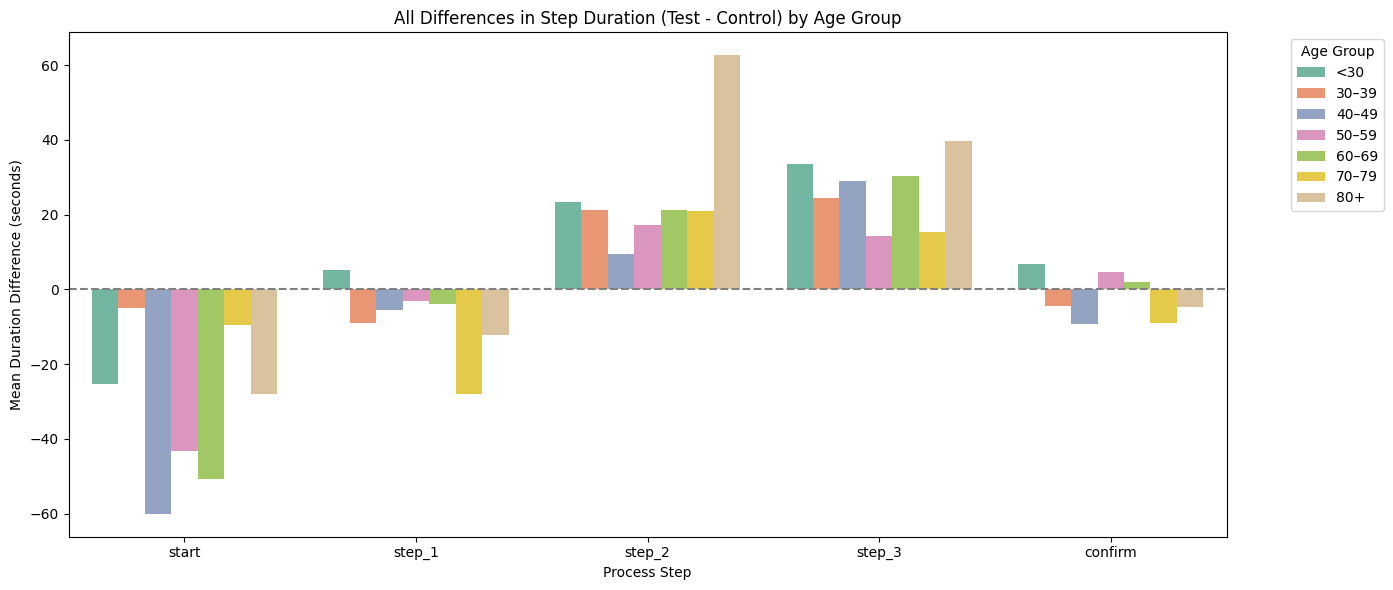

In [47]:
# Apply sorting
full_results_df['Step'] = pd.Categorical(full_results_df['Step'], categories=step_order, ordered=True)
full_results_df['Age Group'] = pd.Categorical(full_results_df['Age Group'], categories=age_order, ordered=True)
full_results_df = full_results_df.sort_values(by=['Step', 'Age Group']).reset_index(drop=True)

# Calculate difference in means
full_results_df['Mean Difference (s)'] = full_results_df['Test Mean Duration (s)'] - full_results_df['Control Mean Duration (s)']

# Create bar plot with all data
plt.figure(figsize=(14, 6))
sns.barplot(
    data=full_results_df,
    x='Step',
    y='Mean Difference (s)',
    hue='Age Group',
    palette='Set2'
)

plt.axhline(0, color='gray', linestyle='--')
plt.title("All Differences in Step Duration (Test - Control) by Age Group")
plt.ylabel("Mean Duration Difference (seconds)")
plt.xlabel("Process Step")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
Hypotheses:
	• H₀: Test group mean duration = Control group mean duration
	• H₁: Test group mean duration ≠ Control group mean duration


Bars above 0 → Test group took longer ( slower experience)
Bars below 0 → Test group was faster ( better efficiency)

Test not just the age

In [ ]:
Lookup infographics and A/B Testing
more to show

Heatmap change to seconds

time spent on each step

In [3]:
# Recompute from clean state after earlier errors

# Recompute test and control splits
df_test = df_duration[df_duration['Variation'] == 'Test']
df_control = df_duration[df_duration['Variation'] == 'Control']

# Compute average duration per process step without age group breakdown
avg_duration_test_all = df_test.groupby('process_step')['step_duration'].mean()
avg_duration_control_all = df_control.groupby('process_step')['step_duration'].mean()

# Display both Series
avg_duration_test_all, avg_duration_control_all


NameError: name 'df_duration' is not defined

In [4]:
import pandas as pd
import numpy as np
from datetime import timedelta

# Simulate visit data
np.random.seed(42)
visit_ids = np.repeat(np.arange(1000, 1100), 5)  # 100 visits × 5 steps
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm'] * 100
base_time = pd.Timestamp('2023-01-01 08:00:00')

# Generate timestamps with random step durations
durations = [int(d) for d in np.random.randint(30, 150, size=len(visit_ids))]
timestamps = [base_time]
for dur in durations[:-1]:
    timestamps.append(timestamps[-1] + timedelta(seconds=dur))

# Build the DataFrame
df = pd.DataFrame({
    'visit_id': visit_ids,
    'process_step': steps,
    'date_time': timestamps,
    'clnt_age': np.random.randint(20, 85, size=len(visit_ids)),
    'Variation': np.random.choice(['Test', 'Control'], size=len(visit_ids))
})

# Sort by visit and time, calculate step duration
df_sorted = df.sort_values(by=['visit_id', 'date_time'])
df_sorted['step_duration'] = df_sorted.groupby('visit_id')['date_time'].diff().dt.total_seconds()

# Drop the first step (no previous timestamp to calculate duration)
df_duration = df_sorted.dropna(subset=['step_duration'])


In [7]:
df_test = df_duration[df_duration['Variation'] == 'Test']
df_control = df_duration[df_duration['Variation'] == 'Control']

In [8]:
import pandas as pd
import numpy as np
from datetime import timedelta

# 1. Simulate data
np.random.seed(42)
visit_ids = np.repeat(np.arange(1000, 1100), 5)  # 100 visits × 5 steps
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm'] * 100
base_time = pd.Timestamp('2023-01-01 08:00:00')

# Generate random durations (30–150 seconds)
durations = [int(d) for d in np.random.randint(30, 150, size=len(visit_ids))]
timestamps = [base_time]
for dur in durations[:-1]:
    timestamps.append(timestamps[-1] + timedelta(seconds=dur))

# Build DataFrame
df = pd.DataFrame({
    'visit_id': visit_ids,
    'process_step': steps,
    'date_time': timestamps,
    'clnt_age': np.random.randint(20, 85, size=len(visit_ids)),
    'Variation': np.random.choice(['Test', 'Control'], size=len(visit_ids))
})

# 2. Sort and calculate step durations
df_sorted = df.sort_values(by=['visit_id', 'date_time'])
df_sorted['step_duration'] = df_sorted.groupby('visit_id')['date_time'].diff().dt.total_seconds()

# 3. Drop first steps (no duration)
df_duration = df_sorted.dropna(subset=['step_duration'])

# 4. Split into groups
df_test = df_duration[df_duration['Variation'] == 'Test']
df_control = df_duration[df_duration['Variation'] == 'Control']

# 5. Compute average step durations (in seconds)
avg_duration_test_all = df_test.groupby('process_step')['step_duration'].mean()
avg_duration_control_all = df_control.groupby('process_step')['step_duration'].mean()

# 6. Display results
print("✅ Average Step Duration (Test Group):\n", avg_duration_test_all)
print("\n✅ Average Step Duration (Control Group):\n", avg_duration_control_all)


✅ Average Step Duration (Test Group):
 process_step
confirm    78.866667
step_1     92.553571
step_2     86.357143
step_3     86.886792
Name: step_duration, dtype: float64

✅ Average Step Duration (Control Group):
 process_step
confirm    96.472727
step_1     87.227273
step_2     88.590909
step_3     98.191489
Name: step_duration, dtype: float64
